In [5]:
!pip install pingouin

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [7]:
data = pd.read_csv('Bushtucker.csv')

In [8]:
data

,participant,stick_insect,kangaroo_testicle,fish_eye,witchetty_grub
0,P1,8,7,1,6
1,P2,9,5,2,5
2,P3,6,2,3,8
3,P4,5,3,1,9
4,P5,8,4,5,8
5,P6,7,5,6,7
6,P7,10,2,7,2
7,P8,12,6,8,1


### **Converting data from wide to Long format**

In [9]:
df = pd.melt(data, id_vars=['participant'], value_vars=['stick_insect','kangaroo_testicle','fish_eye','witchetty_grub'])

In [10]:
df.sort_values(['participant','variable'],inplace=True)

In [11]:
df.head(8)

,participant,variable,value
16,P1,fish_eye,1
8,P1,kangaroo_testicle,7
0,P1,stick_insect,8
24,P1,witchetty_grub,6
17,P2,fish_eye,2
9,P2,kangaroo_testicle,5
1,P2,stick_insect,9
25,P2,witchetty_grub,5


### **Analyzing the data**

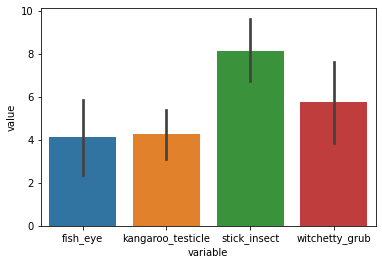

In [12]:
_ = sns.barplot(x='variable', y='value',data=df)

In [13]:
df.groupby('variable').describe()['value']

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
fish_eye,8.0,4.125,2.748376,1.0,1.75,4.0,6.25,8.0
kangaroo_testicle,8.0,4.250,1.832251,2.0,2.75,4.5,5.25,7.0
stick_insect,8.0,8.125,2.232071,5.0,6.75,8.0,9.25,12.0
witchetty_grub,8.0,5.750,2.915476,1.0,4.25,6.5,8.00,9.0


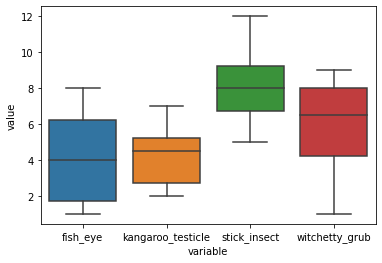

In [14]:

_ = sns.boxplot(x='variable', y='value',data=df)

# Repeated Measure Anova

In [17]:
import statsmodels.stats.anova as sp

In [18]:
aovrm = sp.AnovaRM(df, 'value', 'participant', within=['variable'])
res = aovrm.fit()
res.summary()

,F Value,Num DF,Den DF,Pr > F
variable,3.7938,3.0000,21.0000,0.0256


In [131]:
pg.rm_anova(data,effsize='n2')

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,n2,eps,sphericity,W-spher,p-spher
0,Within,3,21,3.793806,0.02557,0.062584,0.35148,0.532846,False,0.136248,0.046846


## **The following code is done because there was not enough R like repeated measure library in python. This is completely optional and is performed just to follow better along with the text and theory.** 

## **Installing and loading required R libraries**

In [20]:
%reload_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [21]:
%%R
install.packages("ez");  install.packages("ggplot2");  install.packages("multcomp");  install.packages("nlme");  install.packages("pastecs"); install.packages("reshape"); install.packages("WRS", repos="http://R-Forge.R-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘car’, ‘lme4’, ‘plyr’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.56.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 188501 bytes (184 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [64]:
%%R
library(ez);  library(ggplot2);  library(multcomp);  library(nlme); library(pastecs); library(reshape)

In [61]:
%%R
install.packages(c("MASS", "akima", "robustbase"))
install.packages(c("cobs", "robust", "mgcv", "scatterplot3d", "quantreg", "rrcov", "lars", "pwr", "trimcluster", "parallel", "mc2d", "psych", "Rfit"))
 
# third: install WRS
install.packages("WRS", repos="http://R-Forge.R-project.org", type="source")

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/MASS_7.3-52.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 494809 bytes (483 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [63]:
%%R
library("WRS")

## **Loading Data**

In [25]:
%%R
bushData<-read.delim("Bushtucker.dat", header = TRUE)

In [26]:
%%R
bushData

  participant stick_insect kangaroo_testicle fish_eye witchetty_grub
1          P1            8                 7        1              6
2          P2            9                 5        2              5
3          P3            6                 2        3              8
4          P4            5                 3        1              9
5          P5            8                 4        5              8
6          P6            7                 5        6              7
7          P7           10                 2        7              2
8          P8           12                 6        8              1


In [27]:
%%R
longBush<-melt(bushData, id = "participant", measured = c("stick_insect", "kangaroo_testicle", "fish_eye", "witchetty_grub"))

In [28]:
%%R
names(longBush)<-c("Participant", "Animal", "Retch")

In [29]:
%%R
longBush$Animal<-factor(longBush$Animal, labels = c("Stick Insect", "Kangaroo Testicle", "Fish Eye", "Witchetty Grub"))

In [30]:
%%R
by(longBush$Retch, longBush$Animal, stat.desc)

longBush$Animal: Stick Insect
     nbr.val     nbr.null       nbr.na          min          max        range 
   8.0000000    0.0000000    0.0000000    5.0000000   12.0000000    7.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
  65.0000000    8.0000000    8.1250000    0.7891564    1.8660584    4.9821429 
     std.dev     coef.var 
   2.2320714    0.2747165 
------------------------------------------------------------ 
longBush$Animal: Kangaroo Testicle
     nbr.val     nbr.null       nbr.na          min          max        range 
   8.0000000    0.0000000    0.0000000    2.0000000    7.0000000    5.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
  34.0000000    4.5000000    4.2500000    0.6477985    1.5318000    3.3571429 
     std.dev     coef.var 
   1.8322508    0.4311178 
------------------------------------------------------------ 
longBush$Animal: Fish Eye
     nbr.val     nbr.null       nbr.na       

In [31]:
%%R
PartvsWhole<-c(1, -1, -1, 1)
TesticlevsEye<-c(0, -1, 1, 0)
StickvsGrub<-c(-1, 0, 0, 1)
contrasts(longBush$Animal)<-cbind(PartvsWhole, TesticlevsEye, StickvsGrub)

In [32]:
%%R
longBush$Animal 

 [1] Stick Insect      Stick Insect      Stick Insect      Stick Insect     
 [5] Stick Insect      Stick Insect      Stick Insect      Stick Insect     
 [9] Kangaroo Testicle Kangaroo Testicle Kangaroo Testicle Kangaroo Testicle
[13] Kangaroo Testicle Kangaroo Testicle Kangaroo Testicle Kangaroo Testicle
[17] Fish Eye          Fish Eye          Fish Eye          Fish Eye         
[21] Fish Eye          Fish Eye          Fish Eye          Fish Eye         
[25] Witchetty Grub    Witchetty Grub    Witchetty Grub    Witchetty Grub   
[29] Witchetty Grub    Witchetty Grub    Witchetty Grub    Witchetty Grub   
attr(,"contrasts")
                  PartvsWhole TesticlevsEye StickvsGrub
Stick Insect                1             0          -1
Kangaroo Testicle          -1            -1           0
Fish Eye                   -1             1           0
Witchetty Grub              1             0           1
Levels: Stick Insect Kangaroo Testicle Fish Eye Witchetty Grub


In [33]:
%%R
bushModel<-ezANOVA(data = longBush, dv = .(Retch), wid = .(Participant),  within = .(Animal), detailed = TRUE, type = 3)

## ***The real part for Why we used R***

In [34]:
%%R
bushModel

$ANOVA
       Effect DFn DFd     SSn     SSd          F            p p<.05       ges
1 (Intercept)   1   7 990.125  17.375 398.899281 1.973536e-07     * 0.8529127
2      Animal   3  21  83.125 153.375   3.793806 2.557030e-02     * 0.3274249

$`Mauchly's Test for Sphericity`
  Effect        W          p p<.05
2 Animal 0.136248 0.04684581     *

$`Sphericity Corrections`
  Effect       GGe      p[GG] p[GG]<.05       HFe      p[HF] p[HF]<.05
2 Animal 0.5328456 0.06258412           0.6657636 0.04833061         *



In [35]:
# so from above table
pGG = 0.06258412 # shows F  non-significant, also, this correction tends to be quite conservative
pHF = 0.04833061 # shows F  significant also, this correction tends to be quite liberal

In [36]:
average = (pGG+pHF)/2
average

0.055457364999999995

### *Therefore, we should probably go with the Greenhouse–Geisser correction and conclude that the F-ratio is non-significant*

## **The slightly more complicated way: the multilevel approach**

In [57]:
mlm_mod = smf.mixedlm(
    formula = 'value ~ variable', 
    groups = 'participant', 
    data=df
)
# Run the fit
mlm_result = mlm_mod.fit(reml = False)   # we are using method maximum likelihood instead of restricted maximum  likelihood
# Print out the summary of the fit
mlm_result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                  MixedLM      Dependent Variable:      value   
No. Observations:       32           Method:                  ML      
No. Groups:             8            Scale:                   5.3359  
Min. group size:        4            Likelihood:              -72.1975
Max. group size:        4            Converged:               Yes     
Mean group size:        4.0                                           
----------------------------------------------------------------------
                              Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                     4.125    0.817 5.051 0.000  2.524  5.726
variable[T.kangaroo_testicle] 0.125    1.155 0.108 0.914 -2.139  2.389
variable[T.stick_insect]      4.000    1.155 3.463 0.001  1.736  6.264
variable[T.witchetty_grub]    1.625    1.155 1.407 0.159 -0.639  3.889
participant Var               0.000                                   
======================================================================

"""

In [41]:
mlm_mod_baseline = smf.mixedlm(
    formula = 'value ~ 1', 
    groups = 'participant', 
    data=df
)

# Run the fit
mlm_result_baseline = mlm_mod_baseline.fit(reml=False)

# Print out the summary of the fit
mlm_result_baseline.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM  Dependent Variable:  value   
No. Observations:  32       Method:              ML      
No. Groups:        8        Scale:               7.9336  
Min. group size:   4        Likelihood:          -78.5437
Max. group size:   4        Converged:           Yes     
Mean group size:   4.0                                   
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       5.563    0.498 11.171 0.000  4.587  6.538
participant Var 0.000                                    
=========================================================

"""

In [42]:
chiSquare_ratio = (-2*mlm_result_baseline.llf-(-2*mlm_result.llf))
chiSquare_ratio

12.69252869295093

In [43]:
print('aic: ',mlm_result.aic,'\t','bic: ',mlm_result.bic,'\t','log likelihood: ',mlm_result.llf)

aic:  156.39493318781382 	 bic:  165.18934860461218 	 log likelihood:  -72.19746659390691


In [44]:
print('aic: ',mlm_result_baseline.aic, '\t','bic: ',mlm_result_baseline.bic,'\t','log likelihood: ',mlm_result_baseline.llf)

aic:  163.08746188076475 	 bic:  167.48466958916393 	 log likelihood:  -78.54373094038237


In [45]:
chi_df = 3

In [46]:
chi_square_pvalue = 1 - st.chi2.cdf(12.692,chi_df)

In [47]:
print('chisquare_Stats: ',chiSquare_ratio,'\t', 'p_value',chi_square_pvalue)

chisquare_Stats:  12.69252869295093 	 p_value 0.00535230533784814


### **By comparing these models we can see whether adding the variable Animal as a predictor significantly improves the model**

## **Contrast view**

In [66]:
%%R
bushModel<-lme(Retch ~ Animal, random = ~1|Participant/Animal, data = longBush, method = "ML")

In [67]:
%%R
summary(bushModel)

Linear mixed-effects model fit by maximum likelihood
 Data: longBush 
       AIC      BIC    logLik
  158.3949 168.6551 -72.19747

Random effects:
 Formula: ~1 | Participant
        (Intercept)
StdDev: 7.75689e-05

 Formula: ~1 | Animal %in% Participant
        (Intercept)   Residual
StdDev:    2.309935 0.01176185

Fixed effects: Retch ~ Animal 
                      Value Std.Error DF   t-value p-value
(Intercept)          5.5625 0.4365423 21 12.742178  0.0000
AnimalPartvsWhole    1.3750 0.4365423 21  3.149752  0.0048
AnimalTesticlevsEye -0.0625 0.6173641 21 -0.101237  0.9203
AnimalStickvsGrub   -1.1875 0.6173641 21 -1.923500  0.0681
 Correlation: 
                    (Intr) AnmlPW AnmlTE
AnimalPartvsWhole   0                   
AnimalTesticlevsEye 0      0            
AnimalStickvsGrub   0      0      0     

Standardized Within-Group Residuals:
          Min            Q1           Med            Q3           Max 
-0.0104702808 -0.0046840730  0.0001377669  0.0041330056  0.0085415448

In [72]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [73]:
multicomp = MultiComparison(df['value'], df['variable'])   # testfunc

In [74]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_rel, method='bonf')
print(com[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
      group1            group2        stat   pval  pval_corr reject
-------------------------------------------------------------------
         fish_eye kangaroo_testicle  -0.104 0.9201       1.0  False
         fish_eye      stick_insect  -5.465 0.0009    0.0056   True
         fish_eye    witchetty_grub -0.8919  0.402       1.0  False
kangaroo_testicle      stick_insect -4.7753  0.002    0.0121   True
kangaroo_testicle    witchetty_grub -1.1225 0.2987       1.0  False
     stick_insect    witchetty_grub  1.3252 0.2267       1.0  False
-------------------------------------------------------------------


In [75]:
# Tukey HSD
co = multicomp.tukeyhsd(alpha=0.05)
co.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
fish_eye,kangaroo_testicle,0.125,0.9,-3.2462,3.4962,False
fish_eye,stick_insect,4.0,0.0154,0.6288,7.3712,True
fish_eye,witchetty_grub,1.625,0.555,-1.7462,4.9962,False
kangaroo_testicle,stick_insect,3.875,0.0196,0.5038,7.2462,True
kangaroo_testicle,witchetty_grub,1.5,0.6107,-1.8712,4.8712,False
stick_insect,witchetty_grub,-2.375,0.2414,-5.7462,0.9962,False


## **Although  the  contrasts  tell  us  everything  we  need  to  know,  if  there  had  not  been  a logical  set  of  contrasts  to  do  we  might  have  done post  hoc  tests as above.**

## **Summary : Repaeated Measure Anova**
### The one-way repeated-measures ANOVA compares several means, when those means have come from the same partici-pants; for example, if you measured people’s statistical ability each month over a year-long course.

### There are several ways to do repeated-measures ANOVA. One is a conventional ANOVA approach using the rm_anova in pingouin or Anova_RM in statsmodels func-tion; the other is to use a multilevel linear model using the mixedlm function.Or see the R functions used.

### In repeated-measures ANOVA there is an additional assumption: sphericity. This assumption needs to be considered only when you have three or more repeated-measures conditions. If you use the pingouin rm_anova() function then test for sphericity using Mauchly’s test. If the p-value is less than .05 then the assumption is violated. If the significance of Mauchly’s test is greater than .05 then the assumption of sphericity has been met.

###  If the assumption of sphericity has been met then use the p-value for the main ANOVA. If the assumption was violated then read the p-value corrected using either the Greenhouse–Geisser (p[GG]) or Huynh–Feldt (p[HF]) estimate of sphericity (read this chapter to find out the relative merits of the two procedures). If the p-value is less than .05 then the means of the groups are significantly different.

### If you use lme() then you can forget about sphericity.

### For contrasts and post hoc tests, again look to the p-valuesto discover if your comparisons are significant (they will be if the significance value is less than .05)

# Robust one-way repeated-measures ANOVA

### we will use R here




In [82]:
%%R
# This command takes the bushData object and retains all of the rows 
# (hence no command before the comma) but drops column 1 by specifying -c(1), the minus sign means ‘delete’ in this context
bushData2 <- bushData[,-c(1)]

In [83]:
%%R
bushData2

  stick_insect kangaroo_testicle fish_eye witchetty_grub
1            8                 7        1              6
2            9                 5        2              5
3            6                 2        3              8
4            5                 3        1              9
5            8                 4        5              8
6            7                 5        6              7
7           10                 2        7              2
8           12                 6        8              1


### **Using Trimmed Means**[link text](https:// [link text](https://))

In [92]:
%%R
rmanova(bushData2, tr=.2)

[1] "The number of groups to be compared is"
[1] 4
$test
[1] 2.752794

$df
[1]  2.309193 11.545964

$siglevel
[1] 0.1002

$tmeans
[1] 8.000000 4.166667 4.000000 6.000000

$ehat
[1] 0.5873188

$etil
[1] 0.7697309



In [94]:
%%R
rmanovab(bushData2, nboot = 2000)

[1] "Taking bootstrap samples. Please wait."
[1] "The number of groups to be compared is"
[1] 4
$teststat
[1] 2.752794

$crit
[1] 5.623696



#### **we can say that there were no significant differences in retch times after eating different animals from both of above robust procedures**

### **using robust post-hoc test**



In [99]:
%%R
# post hoc test corresponding rmanova above
rmmcp(bushData2)

$n
[1] 8

$test
     Group Group       test    p.value  p.crit        se
[1,]     1     2  3.7282016 0.01359625 0.01020 0.9834947
[2,]     1     3  3.8733436 0.01172054 0.00851 1.0326995
[3,]     1     4  0.8355727 0.44148206 0.01690 2.3935678
[4,]     2     3  0.0000000 1.00000000 0.05000 1.2769904
[5,]     2     4 -1.0454201 0.34371248 0.01270 1.7536809
[6,]     3     4 -0.8000000 0.46001407 0.02500 2.5000000

$psihat
     Group Group    psihat    ci.lower  ci.upper
[1,]     1     2  3.666667  -0.4830017  7.816335
[2,]     1     3  4.000000  -0.3572784  8.357278
[3,]     1     4  2.000000  -8.0992023 12.099202
[4,]     2     3  0.000000  -5.3880170  5.388017
[5,]     2     4 -1.833333  -9.2326553  5.565989
[6,]     3     4 -2.000000 -12.5482728  8.548273

$con
     [,1]
[1,]    0

$num.sig
[1] 0



In [98]:
%%R
pairdepb(bushData2, nboot = 2000)

[1] "Taking bootstrap samples. Please wait."
$test
     Group Group       test        se
[1,]     1     2  4.2097438 0.9105859
[2,]     1     3  3.8729833 1.0327956
[3,]     1     4  1.0192944 1.9621417
[4,]     2     3  0.1116291 1.4930394
[5,]     2     4 -1.1527967 1.5903354
[6,]     3     4 -0.9144599 2.1870833

$psihat
     Group Group     psihat   ci.lower  ci.upper
[1,]     1     2  3.8333333  -1.023125  8.689791
[2,]     1     3  4.0000000  -1.508243  9.508243
[3,]     1     4  2.0000000  -8.464756 12.464756
[4,]     2     3  0.1666667  -7.796210  8.129543
[5,]     2     4 -1.8333333 -10.315122  6.648455
[6,]     3     4 -2.0000000 -13.664444  9.664444

$crit
[1] 5.333333



#### **None of group differs significantly using these post-hoc tests**

# Calculating various sum of squares

1.   List item
2.   List item



In [103]:
df['value'].describe()

count    32.000000
mean      5.562500
std       2.861733
min       1.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      12.000000
Name: value, dtype: float64

In [105]:
SSt = df['value'].std()**2 * (32-1)
SSt

253.875

In [106]:
SSt_df = df['value'].count()-1
SSt_df

31

In [111]:
std = list(df.groupby('participant').describe()['value']['std'])

In [112]:
std

[3.1091263510296048,
 2.8722813232690143,
 2.753785273643051,
 3.415650255319866,
 2.0615528128088303,
 0.9574271077563381,
 3.947573094109004,
 4.573474244670748]

In [113]:
SSw = 0
for i in range(8):
  SSw += std[i]**2 * (4-1)

SSw


236.5

In [114]:
SSw_df = (4-1)*8
SSw_df

24

In [120]:
mean = list(df.groupby('variable').describe()['value']['mean'])
mean

[4.125, 4.25, 8.125, 5.75]

In [122]:
SSm = 0
for i in range(4):
  SSm += (8)*(df['value'].mean()-mean[i])**2

SSm

83.125

In [124]:
SSm_df = 4-1     # k-1
SSm_df

3

In [125]:
SSr = SSw-SSm
SSr

153.375

In [126]:
SSr_df = SSw_df-SSm_df
SSr_df

21

In [127]:
SSb = SSt-SSw
SSb

17.375

In [128]:
MSm = SSm/SSm_df
MSm

27.708333333333332

In [129]:
MSr = SSr/SSr_df
MSr

7.303571428571429

In [130]:
F = MSm/MSr
F

3.793806030969845

# Effect *Size*

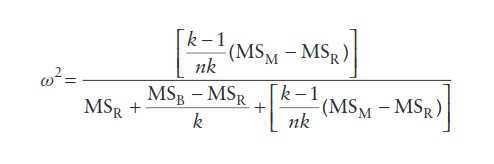

In [132]:
from IPython.display import Image
Image('omega_2.png')

#### The abova formula is lengthy one and one is welcome to calculate by hand but a practical solution is to use generalized eta-squared which is the output of pingouin rm_anova()  under column labelled n2 and also R's ezANOVA() under column labelled ges

### more focussed effect size measure

In [134]:
def rcontrast(t,df):
  return np.sqrt(t**2/(t**2+df))

In [135]:
# using contrast model calculated with the help of R
print(rcontrast(3.149752, 21),'\t',rcontrast(-0.101237, 21),'\t',rcontrast(-1.923500, 21))

0.5664349376774241 	 0.022086335656202577 	 0.3870303413102435


#### which show that the difference between body parts and whole animals was a large effect(r= .57), between the stick insect and witchetty grub a medium effect (r= .39), but between the testicle and eyeball a very small effect (r= .02).*italicized text*

# Reporting one-way repeated-measures designs 

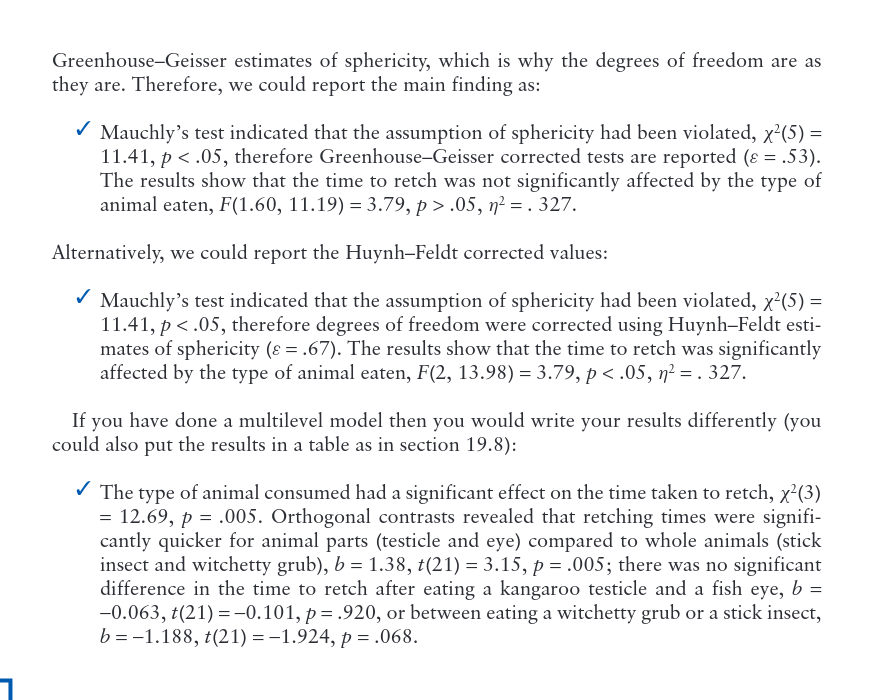

In [136]:
Image('reporing1.png')